<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/EEMD_Bridging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis using EMD and Dilated Convolutional Neural Networks¶**
https://github.com/3catz/deeplearning_timeseries/blob/master/Air_Quality_Time_Series_Series_Forecasting_with_EEMD_and_Fully_Convolutional_Neural_Networks.ipynb

In [1]:
!pip install EMD-signal
!pip install auto_ml
!pip install pyhht
!pip install six
#!pip install -U scikit-learn scipy matplotlib

#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
#from auto_ml import Predictor
#from auto_ml.utils import get_boston_dataset
#from auto_ml.utils_models import load_ml_model

from PyEMD import EEMD 
eemd = EEMD(max_imfs=8)
#pip install PeakUtils
from sklearn.preprocessing import MinMaxScaler, RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score

import matplotlib.pyplot as plt
import os 
from scipy.integrate import odeint
#keras
from keras.models import *
from keras.layers import * 
from keras.optimizers import *
from keras.callbacks import *
from keras import backend as K


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 115 kB 47.4 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 4.9 MB/s 
     |████████████████████████████████| 627 kB 8.6 MB/s 
     |████████████████████████████████| 150 kB 46.0 MB/s 
     |████████████████████████████████| 2.9 MB 40.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 10.4 MB 33.1 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 219 kB 47.6 MB/s 
     |████████████████████████████████| 162 kB 40.0 MB/s 
  

In [2]:
def series_to_supervised(data, n_in, n_out, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [5]:
data= pd.read_csv("/content/Real Price.csv")

In [7]:
import numpy as np
data = np.genfromtxt("/content/Real Price.csv", delimiter = ","); data = np.asarray(data); data.shape

(52608,)

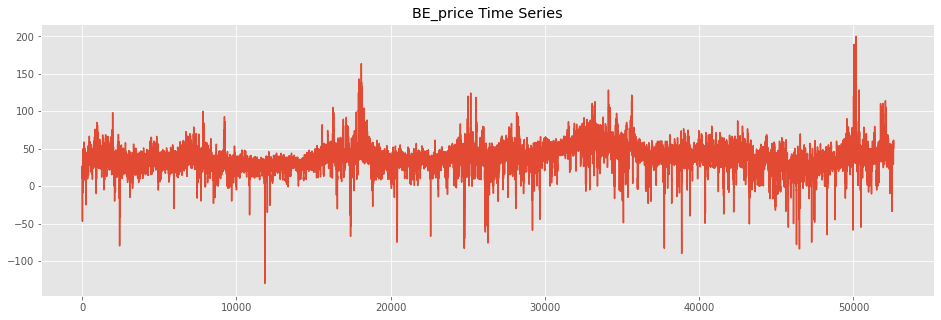

In [8]:
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("BE_price Time Series")
plt.show()

In [9]:
data = np.transpose(data)

In [10]:
# before you do the EMD, cut out the out of sample part so that the EMDs are not constructed with those future values and information contained within them

in_sample = data[:-17640]; out_sample = data[-17640:]
print(in_sample.shape)
print(in_sample)

(34968,)
[18.29 16.04 14.6  ... 64.62 56.81 50.04]


In [11]:
in_sample = in_sample.reshape(-1,1)
out_sample = out_sample.reshape(-1,1)
print(in_sample)


[[18.29]
 [16.04]
 [14.6 ]
 ...
 [64.62]
 [56.81]
 [50.04]]


In [12]:
#eemd for in-sample
eemd = EEMD()
eemd.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)




(34968, 1) (34968, 1)


In [20]:
#eemd for in-sample
imfs_in = eemd(in_sample, t, 8)

print(imfs_in.shape)

(9, 34968)


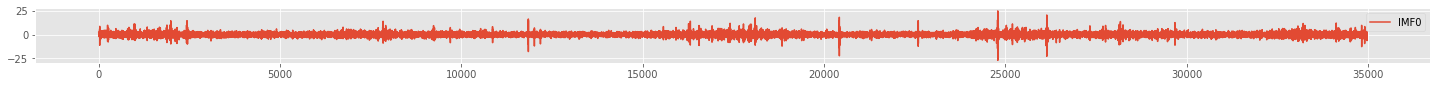

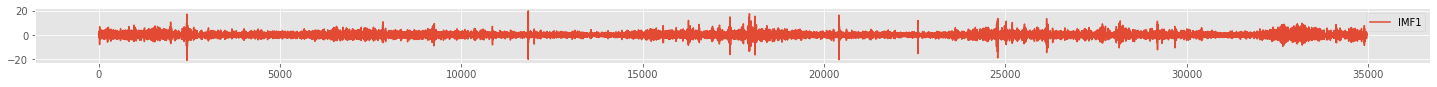

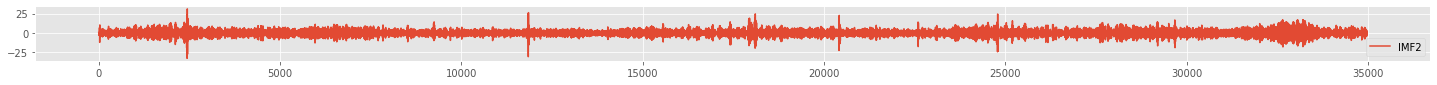

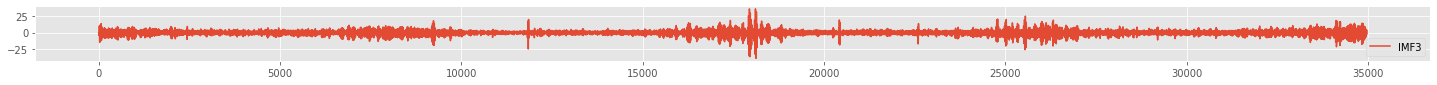

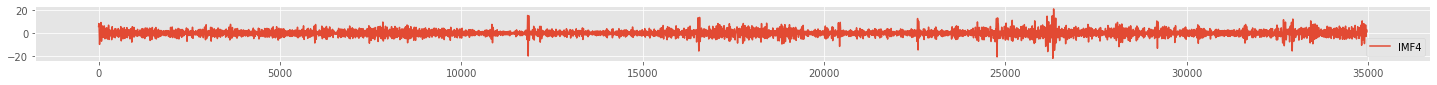

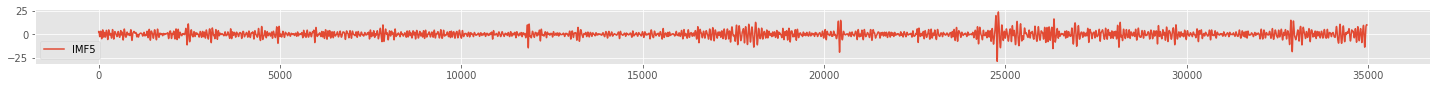

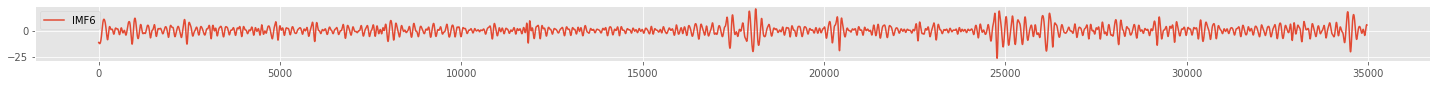

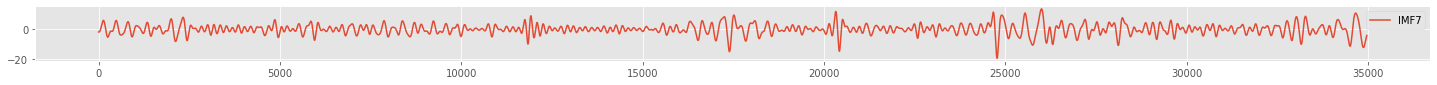

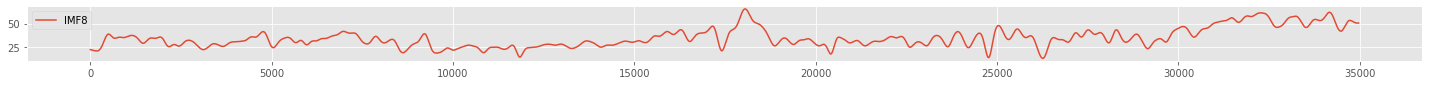

In [21]:
for i in range(len(imfs_in)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs_in[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [22]:
#eemd for out-sample
eemd = EEMD()
eemd.extrema_detection = "simple"
t_out = np.linspace(0, out_sample.shape[0], out_sample.shape[0])
t_out = t_out.reshape(-1,1)
print(t_out.shape, out_sample.shape)
t_out = np.squeeze(t_out)
out_sample = np.squeeze(out_sample)


(17640, 1) (17640, 1)


In [23]:
#eemd for out-sample
imfs_out = eemd(out_sample, t_out, 8)

print(imfs_out.shape)

(9, 17640)


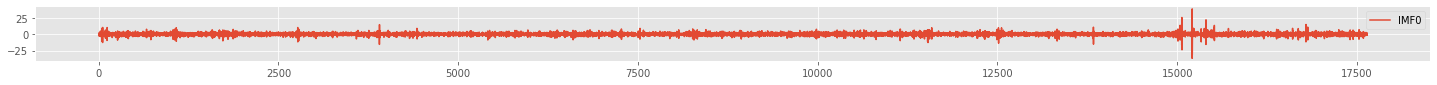

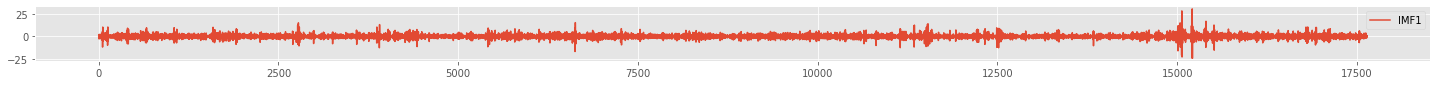

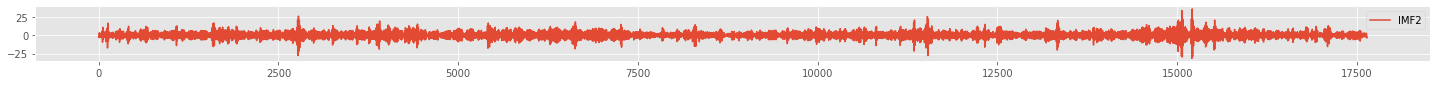

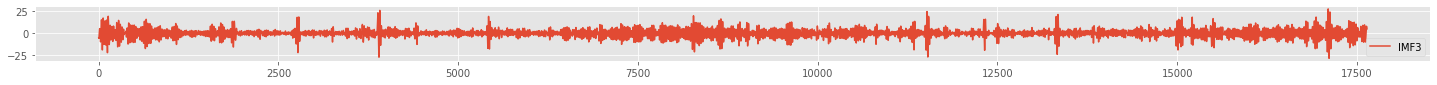

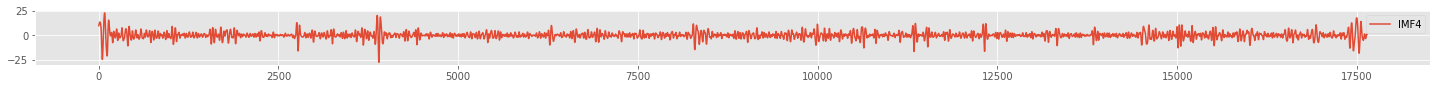

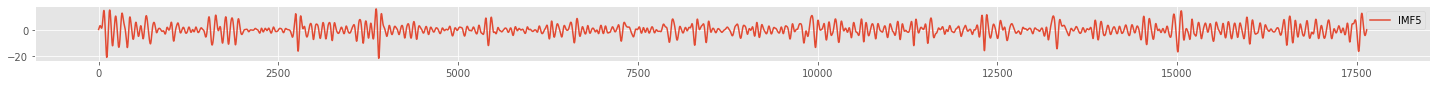

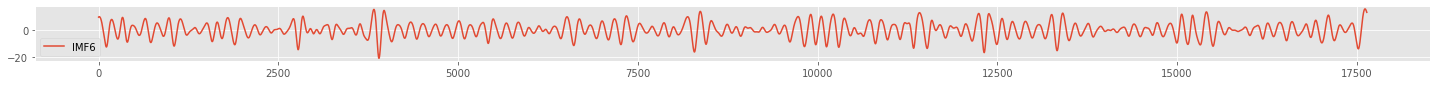

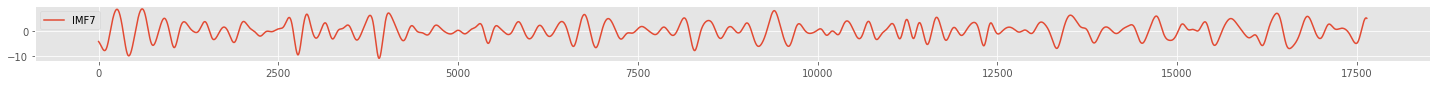

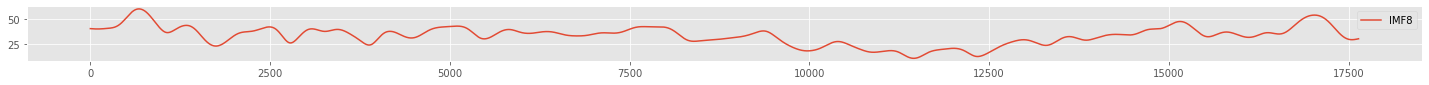

In [24]:
for i in range(len(imfs_out)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs_out[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [61]:
# Save in_sample and out_sample decomposition data
from pandas import DataFrame
import pandas as pd
import csv
Eemd_in_sample=pd.DataFrame(imfs_in).T
Eemd_out_sample=pd.DataFrame(imfs_out).T
#Unscaled decomposed data
#Eemd_in_sample_unscaled=scaler.inverse_transform(Eemd_in_sample['0'])
#Eemd_out_sample_unscaled=scaler.inverse_transform(Eemd_out_sample.reshape(-1,1))
# Save as csv
Eemd_in_sample.to_csv("Eemd_in_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
Eemd_out_sample.to_csv("Eemd_out_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

# Save as excel
Eemd_in_sample.to_excel("Eemd_in_sample.xlsx", header=True)
Eemd_out_sample.to_excel("Eemd_out_sample.xlsx", header=True)
print(Eemd_in_sample)
print(Eemd_out_sample)


              0         1         2         3         4         5         6  \
0     -0.948648 -0.394339  0.872400 -2.388063 -1.545283  1.278584  1.744191   
1     -0.820966  0.319081  1.108019 -2.789296 -1.622732  1.330434  1.773736   
2      0.068257  1.356105  0.938280 -3.308533 -1.659301  1.394418  1.797396   
3      2.114248  0.940462  0.155274 -3.825176 -1.651839  1.470213  1.814992   
4     -2.739158 -0.224828 -1.033705 -4.186107 -1.596283  1.556957  1.826371   
...         ...       ...       ...       ...       ...       ...       ...   
34963  1.325076  1.995280  0.978065  0.971604  3.217285  2.092775  3.258244   
34964 -1.076182 -0.786397 -1.680972  0.154568  3.231663  2.061534  3.231277   
34965 -0.372932 -2.702407 -3.906787 -0.532170  3.191198  2.028218  3.197859   
34966 -0.031530 -2.323478 -4.860596 -0.982168  3.113380  1.992649  3.158082   
34967 -0.078393 -1.790996 -4.068101 -1.110381  3.013612  1.954740  3.112062   

              7          8  
0     -1.567775  26.77

In [62]:
Eemd_in_sample

,0,1,2,3,4,5,6,7,8
0,-0.948648,-0.394339,0.872400,-2.388063,-1.545283,1.278584,1.744191,-1.567775,26.777893
1,-0.820966,0.319081,1.108019,-2.789296,-1.622732,1.330434,1.773736,-1.558711,26.770906
2,0.068257,1.356105,0.938280,-3.308533,-1.659301,1.394418,1.797396,-1.548362,26.764011
3,2.114248,0.940462,0.155274,-3.825176,-1.651839,1.470213,1.814992,-1.536716,26.757209
4,-2.739158,-0.224828,-1.033705,-4.186107,-1.596283,1.556957,1.826371,-1.523762,26.750500
...,...,...,...,...,...,...,...,...,...
34963,1.325076,1.995280,0.978065,0.971604,3.217285,2.092775,3.258244,-3.156735,51.815458
34964,-1.076182,-0.786397,-1.680972,0.154568,3.231663,2.061534,3.231277,-3.118058,51.806409
34965,-0.372932,-2.702407,-3.906787,-0.532170,3.191198,2.028218,3.197859,-3.081230,51.797285
34966,-0.031530,-2.323478,-4.860596,-0.982168,3.113380,1.992649,3.158082,-3.046236,51.788086


In [63]:

# Merge in_ and out_samples in one file and save the full decomposed sample  

frames = [Eemd_in_sample, Eemd_out_sample]

BE_price_Eemd = pd.concat(frames)
BE_price_Eemd=BE_price_Eemd.reset_index()
del BE_price_Eemd[BE_price_Eemd.columns[0]]
BE_price_Eemd.to_csv("BE_price_Eemd.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
BE_price_Eemd.to_excel("BE_price_Eemd.xlsx", header=True)
print(BE_price_Eemd)

              0         1         2         3         4         5         6  \
0     -0.948648 -0.394339  0.872400 -2.388063 -1.545283  1.278584  1.744191   
1     -0.820966  0.319081  1.108019 -2.789296 -1.622732  1.330434  1.773736   
2      0.068257  1.356105  0.938280 -3.308533 -1.659301  1.394418  1.797396   
3      2.114248  0.940462  0.155274 -3.825176 -1.651839  1.470213  1.814992   
4     -2.739158 -0.224828 -1.033705 -4.186107 -1.596283  1.556957  1.826371   
...         ...       ...       ...       ...       ...       ...       ...   
52603 -0.057249 -0.512116  1.086503  4.669333 -1.644125 -1.020807  8.411523   
52604 -1.432207 -1.189716 -1.303483  3.646717 -1.506409 -0.909108  8.245709   
52605  0.386909 -0.517129 -3.343209  2.660527 -1.386974 -0.794743  8.075994   
52606  1.322162 -0.396973 -4.283910  1.871360 -1.285810 -0.678103  7.902545   
52607 -2.196707 -1.390181 -3.770034  1.376633 -1.202211 -0.559467  7.725534   

              7          8  
0     -1.567775  26.77